In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling
from sklearn.preprocessing import LabelEncoder
from math import *
from sklearn.preprocessing import OneHotEncoder
from tqdm.auto import tqdm
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn import preprocessing

In [23]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [24]:
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))
mirrored_strategy = tf.distribute.MirroredStrategy()

Num GPUs Available:  1
INFO:tensorflow:Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:GPU:0',)


In [25]:
df = pd.read_csv('home-credit-default-risk//application_train.csv')

# visualisation data

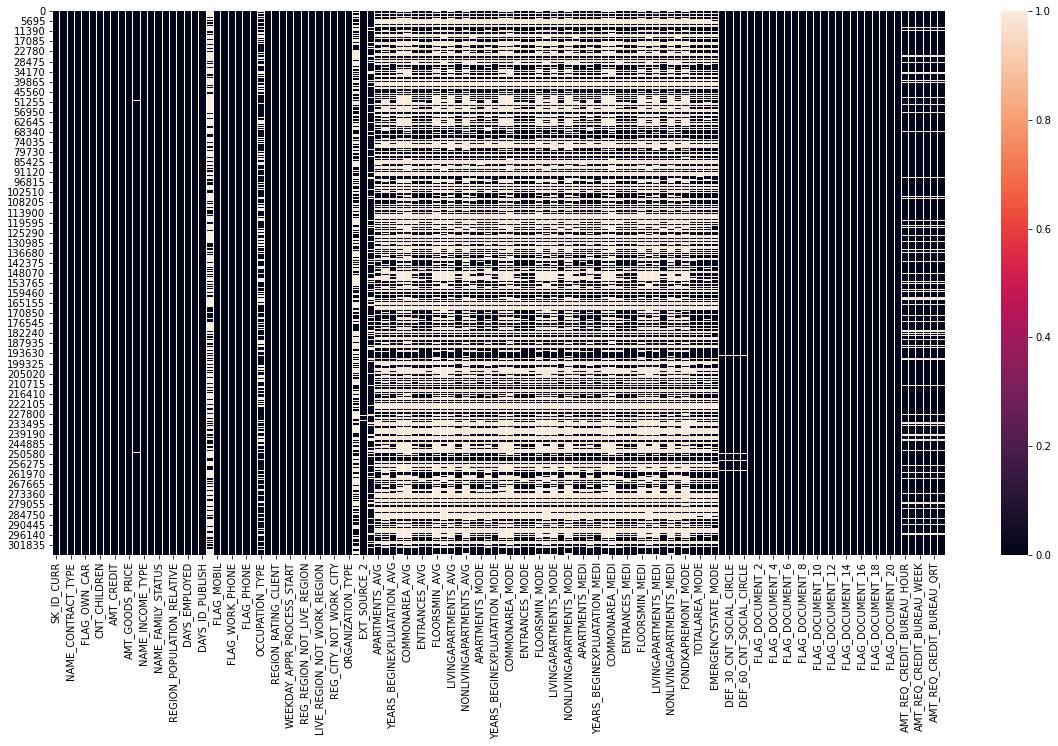

In [5]:
plt.figure(figsize=(20,10))
sns.heatmap(df.isna())

## valeur vide ou null 

In [6]:
(df.isna().sum()/df.shape[0]).sort_values()

SK_ID_CURR                      0.000000
HOUR_APPR_PROCESS_START         0.000000
REG_REGION_NOT_WORK_REGION      0.000000
LIVE_REGION_NOT_WORK_REGION     0.000000
REG_CITY_NOT_LIVE_CITY          0.000000
REG_CITY_NOT_WORK_CITY          0.000000
LIVE_CITY_NOT_WORK_CITY         0.000000
ORGANIZATION_TYPE               0.000000
FLAG_DOCUMENT_21                0.000000
FLAG_DOCUMENT_20                0.000000
FLAG_DOCUMENT_19                0.000000
FLAG_DOCUMENT_18                0.000000
FLAG_DOCUMENT_17                0.000000
FLAG_DOCUMENT_16                0.000000
FLAG_DOCUMENT_15                0.000000
FLAG_DOCUMENT_14                0.000000
FLAG_DOCUMENT_13                0.000000
FLAG_DOCUMENT_12                0.000000
FLAG_DOCUMENT_11                0.000000
FLAG_DOCUMENT_10                0.000000
FLAG_DOCUMENT_9                 0.000000
FLAG_DOCUMENT_8                 0.000000
FLAG_DOCUMENT_7                 0.000000
FLAG_DOCUMENT_6                 0.000000
FLAG_DOCUMENT_5 

In [7]:
#on suppr toutes les colonnes à plus de 90% de val manquante
df = df[df.columns[(df.isna().sum()/df.shape[0]) < 0.9]]

# Variables du csv

In [8]:
df.dtypes.value_counts()

float64    65
int64      41
object     16
dtype: int64

In [ ]:
pbar = tqdm(total=1)
for col in df.select_dtypes('float'):
    plt.figure()
    sns.distplot(df[col])
    pbar.update(1/len(df.select_dtypes('float')))
pbar.close()

In [ ]:
pbar = tqdm(total=1)
for col in df.select_dtypes('object'):
    print(f'{col :-<40} => {df[col].unique()}')
    plt.figure()
    df[col].value_counts(normalize=True, dropna=False).plot.pie()
    pbar.update(1/len(df.select_dtypes('object')))
pbar.close()

# encoder des 16 colonnes objects

In [26]:
le = []
for i,col in enumerate(df.select_dtypes('object').columns):
    try:
        le.append(LabelEncoder())
        df[col] = le[i].fit_transform(df[col].astype(str))
    except:
        print('error : '+col)

# difference entre positif et negatif

In [10]:
df.dtypes.value_counts()

float64    65
int64      41
int32      16
dtype: int64

In [11]:
positif = df[df['TARGET'] == 1 ]
negatif = df[df['TARGET'] != 1 ]

In [12]:
df_int32_columns = df.select_dtypes('int32').columns
df_int64_columns = df.select_dtypes('int64').columns
df_float_columns = df.select_dtypes('float').columns

In [ ]:
pbar = tqdm(total=1)
x=0
y=0
nbr = 3
fig, axs = plt.subplots(ceil(len(df_int32_columns)/nbr), nbr,  figsize=(20, 20))
for col in (df_int32_columns):
    if(x>=nbr):
        x=0
        y+=1
    sns.distplot(positif[col], label='positif', ax=axs[y,x])
    sns.distplot(negatif[col], label='negatif', ax=axs[y,x])
    axs[y,x].legend()
    x+=1
    pbar.update(1/len(df_int32_columns))
pbar.close()

In [ ]:
pbar = tqdm(total=1)
x=0
y=0
nbr = 3
fig, axs = plt.subplots(ceil(len(df_int64_columns)/nbr), nbr,  figsize=(20, 80))
for col in (df_int64_columns):
    if(x>=nbr):
        x=0
        y+=1
    sns.distplot(positif[col], label='positif', ax=axs[y,x])
    sns.distplot(negatif[col], label='negatif', ax=axs[y,x])
    axs[y,x].legend()
    x+=1
    pbar.update(1/len(df_int64_columns))
pbar.close()

In [ ]:
pbar = tqdm(total=1)
x=0
y=0
nbr = 3
fig, axs = plt.subplots(ceil(len(df_float_columns)/nbr), nbr,  figsize=(20, 120))
for col in (df_float_columns):
    if(x>=nbr):
        x=0
        y+=1
    sns.distplot(positif[col], label='positif', ax=axs[y,x])
    sns.distplot(negatif[col], label='negatif', ax=axs[y,x])
    axs[y,x].legend()
    x+=1
    pbar.update(1/len(df_float_columns))
pbar.close()

# nouveau dataTrain

In [27]:
data_train = df[['TARGET','EMERGENCYSTATE_MODE','HOUSETYPE_MODE','OCCUPATION_TYPE','WEEKDAY_APPR_PROCESS_START','ORGANIZATION_TYPE','CODE_GENDER','FLAG_OWN_CAR','FLAG_OWN_REALTY','NAME_INCOME_TYPE','NAME_EDUCATION_TYPE','FONDKAPREMONT_MODE','DAYS_BIRTH','DAYS_ID_PUBLISH','FLAG_PHONE','REG_CITY_NOT_WORK_CITY','FLAG_DOCUMENT_3','AMT_CREDIT','AMT_GOODS_PRICE','REGION_POPULATION_RELATIVE','DAYS_REGISTRATION','EXT_SOURCE_1','EXT_SOURCE_2','EXT_SOURCE_3','OBS_60_CNT_SOCIAL_CIRCLE','DEF_30_CNT_SOCIAL_CIRCLE','OBS_30_CNT_SOCIAL_CIRCLE','DEF_60_CNT_SOCIAL_CIRCLE']]
data_train.head()

,TARGET,EMERGENCYSTATE_MODE,HOUSETYPE_MODE,OCCUPATION_TYPE,WEEKDAY_APPR_PROCESS_START,ORGANIZATION_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,FONDKAPREMONT_MODE,DAYS_BIRTH,DAYS_ID_PUBLISH,FLAG_PHONE,REG_CITY_NOT_WORK_CITY,FLAG_DOCUMENT_3,AMT_CREDIT,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_REGISTRATION,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,OBS_60_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE
0,1,0,0,8,6,5,1,0,1,7,4,3,-9461,-2120,1,0,1,406597.5,351000.0,0.018801,-3648.0,0.083037,0.262949,0.139376,2.0,2.0,2.0,2.0
1,0,0,0,3,1,39,0,0,0,4,1,3,-16765,-291,1,0,1,1293502.5,1129500.0,0.003541,-1186.0,0.311267,0.622246,NaN,1.0,0.0,1.0,0.0
2,0,2,1,8,1,11,1,1,1,7,4,0,-19046,-2531,1,0,0,135000.0,135000.0,0.010032,-4260.0,NaN,0.555912,0.729567,0.0,0.0,0.0,0.0
3,0,2,1,8,6,5,0,0,1,7,4,0,-19005,-2437,0,0,1,312682.5,297000.0,0.008019,-9833.0,NaN,0.650442,NaN,2.0,0.0,2.0,0.0
4,0,2,1,3,4,37,1,0,1,7,4,0,-19932,-3458,0,1,0,513000.0,513000.0,0.028663,-4311.0,NaN,0.322738,NaN,0.0,0.0,0.0,0.0


In [14]:
(data_train.isna().mean()).sort_values()

TARGET                        0.000000
DAYS_REGISTRATION             0.000000
REGION_POPULATION_RELATIVE    0.000000
AMT_CREDIT                    0.000000
FLAG_DOCUMENT_3               0.000000
REG_CITY_NOT_WORK_CITY        0.000000
FLAG_PHONE                    0.000000
DAYS_BIRTH                    0.000000
FONDKAPREMONT_MODE            0.000000
NAME_EDUCATION_TYPE           0.000000
DAYS_ID_PUBLISH               0.000000
FLAG_OWN_REALTY               0.000000
EMERGENCYSTATE_MODE           0.000000
NAME_INCOME_TYPE              0.000000
OCCUPATION_TYPE               0.000000
WEEKDAY_APPR_PROCESS_START    0.000000
HOUSETYPE_MODE                0.000000
CODE_GENDER                   0.000000
FLAG_OWN_CAR                  0.000000
ORGANIZATION_TYPE             0.000000
AMT_GOODS_PRICE               0.000904
EXT_SOURCE_2                  0.002146
OBS_30_CNT_SOCIAL_CIRCLE      0.003320
OBS_60_CNT_SOCIAL_CIRCLE      0.003320
DEF_30_CNT_SOCIAL_CIRCLE      0.003320
DEF_60_CNT_SOCIAL_CIRCLE 

In [15]:
data_train['EMERGENCYSTATE_MODE'].isna().sum()

0

In [ ]:
pbar = tqdm(total=1)
for col in data_train.columns:
    if((data_train[col].isna().sum()) > 0):
        print(f'{col :-<40} => {data_train[col].unique()}')
        plt.figure()
        data_train[col].value_counts(normalize=True, dropna=False).plot.pie()
    pbar.update(1/len(data_train.columns))
pbar.close()

# Valeurs vide

In [28]:
columns = (data_train.isna().mean()).sort_values() >0
columns_index = columns.index[columns.values == True]

In [29]:
imp_median= SimpleImputer(missing_values=np.nan, strategy='median')

pbar = tqdm(total=1)
for column in columns_index:
    
    imp_median= imp_median.fit(data_train[[column]])
    data_train[column] = imp_median.transform(data_train[[column]]).ravel()

    pbar.update(1/(len(columns_index)))
pbar.close()

<ipython-input-29-e140b110cf52>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_train[column] = imp_median.transform(data_train[[column]]).ravel()
<ipython-input-29-e140b110cf52>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_train[column] = imp_median.transform(data_train[[column]]).ravel()
<ipython-input-29-e140b110cf52>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the

<ipython-input-29-e140b110cf52>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_train[column] = imp_median.transform(data_train[[column]]).ravel()
<ipython-input-29-e140b110cf52>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_train[column] = imp_median.transform(data_train[[column]]).ravel()


In [18]:
(data_train.isna().mean()).sort_values()

TARGET                        0.0
DEF_30_CNT_SOCIAL_CIRCLE      0.0
OBS_60_CNT_SOCIAL_CIRCLE      0.0
EXT_SOURCE_3                  0.0
EXT_SOURCE_2                  0.0
EXT_SOURCE_1                  0.0
DAYS_REGISTRATION             0.0
REGION_POPULATION_RELATIVE    0.0
AMT_GOODS_PRICE               0.0
AMT_CREDIT                    0.0
FLAG_DOCUMENT_3               0.0
REG_CITY_NOT_WORK_CITY        0.0
FLAG_PHONE                    0.0
DAYS_ID_PUBLISH               0.0
DAYS_BIRTH                    0.0
FONDKAPREMONT_MODE            0.0
NAME_EDUCATION_TYPE           0.0
NAME_INCOME_TYPE              0.0
FLAG_OWN_REALTY               0.0
FLAG_OWN_CAR                  0.0
CODE_GENDER                   0.0
ORGANIZATION_TYPE             0.0
WEEKDAY_APPR_PROCESS_START    0.0
OCCUPATION_TYPE               0.0
HOUSETYPE_MODE                0.0
EMERGENCYSTATE_MODE           0.0
OBS_30_CNT_SOCIAL_CIRCLE      0.0
DEF_60_CNT_SOCIAL_CIRCLE      0.0
dtype: float64

# normalisation de la data

In [19]:
data_train.head()

,TARGET,EMERGENCYSTATE_MODE,HOUSETYPE_MODE,OCCUPATION_TYPE,WEEKDAY_APPR_PROCESS_START,ORGANIZATION_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,FONDKAPREMONT_MODE,DAYS_BIRTH,DAYS_ID_PUBLISH,FLAG_PHONE,REG_CITY_NOT_WORK_CITY,FLAG_DOCUMENT_3,AMT_CREDIT,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_REGISTRATION,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,OBS_60_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE
0,1,0,0,8,6,5,1,0,1,7,4,3,-9461,-2120,1,0,1,406597.5,351000.0,0.018801,-3648.0,0.083037,0.262949,0.139376,2.0,2.0,2.0,2.0
1,0,0,0,3,1,39,0,0,0,4,1,3,-16765,-291,1,0,1,1293502.5,1129500.0,0.003541,-1186.0,0.311267,0.622246,0.535276,1.0,0.0,1.0,0.0
2,0,2,1,8,1,11,1,1,1,7,4,0,-19046,-2531,1,0,0,135000.0,135000.0,0.010032,-4260.0,0.505998,0.555912,0.729567,0.0,0.0,0.0,0.0
3,0,2,1,8,6,5,0,0,1,7,4,0,-19005,-2437,0,0,1,312682.5,297000.0,0.008019,-9833.0,0.505998,0.650442,0.535276,2.0,0.0,2.0,0.0
4,0,2,1,3,4,37,1,0,1,7,4,0,-19932,-3458,0,1,0,513000.0,513000.0,0.028663,-4311.0,0.505998,0.322738,0.535276,0.0,0.0,0.0,0.0


In [30]:
from sklearn.preprocessing import RobustScaler
x = data_train.values #returns a numpy array
rs = RobustScaler()
x_scaled = rs.fit_transform(x)
df = pd.DataFrame(x_scaled, columns=['TARGET','EMERGENCYSTATE_MODE','HOUSETYPE_MODE','OCCUPATION_TYPE','WEEKDAY_APPR_PROCESS_START','ORGANIZATION_TYPE','CODE_GENDER','FLAG_OWN_CAR','FLAG_OWN_REALTY','NAME_INCOME_TYPE','NAME_EDUCATION_TYPE','FONDKAPREMONT_MODE','DAYS_BIRTH','DAYS_ID_PUBLISH','FLAG_PHONE','REG_CITY_NOT_WORK_CITY','FLAG_DOCUMENT_3','AMT_CREDIT','AMT_GOODS_PRICE','REGION_POPULATION_RELATIVE','DAYS_REGISTRATION','EXT_SOURCE_1','EXT_SOURCE_2','EXT_SOURCE_3','OBS_60_CNT_SOCIAL_CIRCLE','DEF_30_CNT_SOCIAL_CIRCLE','OBS_30_CNT_SOCIAL_CIRCLE','DEF_60_CNT_SOCIAL_CIRCLE'])
df.head()

,TARGET,EMERGENCYSTATE_MODE,HOUSETYPE_MODE,OCCUPATION_TYPE,WEEKDAY_APPR_PROCESS_START,ORGANIZATION_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,FONDKAPREMONT_MODE,DAYS_BIRTH,DAYS_ID_PUBLISH,FLAG_PHONE,REG_CITY_NOT_WORK_CITY,FLAG_DOCUMENT_3,AMT_CREDIT,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_REGISTRATION,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,OBS_60_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE
0,1.0,0.0,-1.0,-0.166667,0.50,-0.666667,1.0,0.0,0.0,0.00,0.0,1.0,0.865181,0.439705,1.0,0.0,0.0,-0.198521,-0.224490,-0.002626,0.156504,-0.422961,-1.120410,-1.805485,1.0,2.0,1.0,2.0
1,0.0,0.0,-1.0,-0.583333,-0.75,0.142857,0.0,0.0,-1.0,-0.75,-1.5,1.0,-0.139634,1.148895,1.0,0.0,0.0,1.448012,1.540816,-0.820550,0.606637,-0.194731,0.208115,0.000000,0.5,0.0,0.5,0.0
2,0.0,1.0,0.0,-0.166667,-0.75,-0.523810,1.0,1.0,0.0,0.00,0.0,0.0,-0.453432,0.280341,1.0,0.0,-1.0,-0.702740,-0.714286,-0.472638,0.044611,0.000000,-0.037158,0.886052,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,-0.166667,0.50,-0.666667,0.0,0.0,0.0,0.00,0.0,0.0,-0.447792,0.316789,0.0,0.0,0.0,-0.372874,-0.346939,-0.580533,-0.974312,0.000000,0.312371,0.000000,1.0,0.0,1.0,0.0
4,0.0,1.0,0.0,-0.583333,0.00,0.095238,1.0,0.0,0.0,0.00,0.0,0.0,-0.575320,-0.079100,0.0,1.0,-1.0,-0.000986,0.142857,0.525969,0.035287,0.000000,-0.899334,0.000000,0.0,0.0,0.0,0.0


# train et test

## methode 3 SMOTE

In [31]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
import imblearn
from collections import Counter

In [32]:
X = data_train
y = data_train.TARGET

smote = SMOTE(random_state=0)
X_resampled, y_resampled = smote.fit_sample(X, y)

X_resampled = pd.DataFrame(X_resampled, columns=X.columns)
data_train = X_resampled

# train test split

In [33]:
X_train, X_test, y_train, y_test = train_test_split(data_train.drop(columns=['TARGET']), data_train['TARGET'], test_size=0.20, random_state=42)

# Reseaux neuronnes 

# Model

In [42]:
model10 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(20, activation='relu', input_shape=(1,27)),
    #tf.keras.layers.Dropout(0.5),
    #tf.keras.layers.Dense(30, activation='relu',kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    #tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [43]:
model10.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 1, 20)             560       
_________________________________________________________________
dense_7 (Dense)              (None, 1, 1)              21        
Total params: 581
Trainable params: 581
Non-trainable params: 0
_________________________________________________________________


In [44]:
model10.compile(loss='binary_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

# Entrainement

In [45]:
history = model10.fit(X_train,
                      y_train,
                    epochs=10,
                    batch_size= 40,
                    callbacks=[tf.keras.callbacks.EarlyStopping(monitor='loss', patience=10),
                               tfdocs.modeling.EpochDots(),
                               tf.keras.callbacks.ModelCheckpoint("weights.best.hdf5", 
                                                                   monitor='accuracy', 
                                                                   verbose=0, 
                                                                   save_best_only=True, 
                                                                   save_weights_only=False, 
                                                                   mode='max', 
                                                                   periode=1)])

Epoch 1/10
11308/11308 [==============================] - ETA: 0s - loss: 266.8862 - accuracy: 0.5141
Epoch: 0, accuracy:0.5141,  loss:266.8862,  
11308/11308 [==============================] - 26s 2ms/step - loss: 266.8862 - accuracy: 0.5141
Epoch 2/10
11308/11308 [==============================] - 25s 2ms/step - loss: 202.2263 - accuracy: 0.5224
Epoch 3/10
11308/11308 [==============================] - 24s 2ms/step - loss: 174.8956 - accuracy: 0.5270
Epoch 4/10
11308/11308 [==============================] - 24s 2ms/step - loss: 160.6586 - accuracy: 0.5300
Epoch 5/10
11308/11308 [==============================] - 24s 2ms/step - loss: 149.9458 - accuracy: 0.5329
Epoch 6/10
11308/11308 [==============================] - 23s 2ms/step - loss: 134.2422 - accuracy: 0.5404
Epoch 7/10
11308/11308 [==============================] - 24s 2ms/step - loss: 127.5847 - accuracy: 0.5453
Epoch 8/10
11308/11308 [==============================] - 24s 2ms/step - loss: 118.4931 - accuracy: 0.5488
Epoch 9/

# Courbe apprentissage cnn

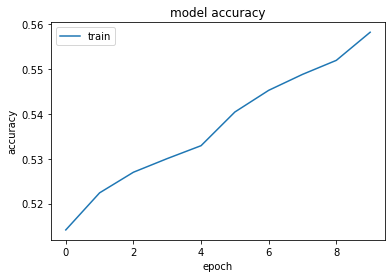

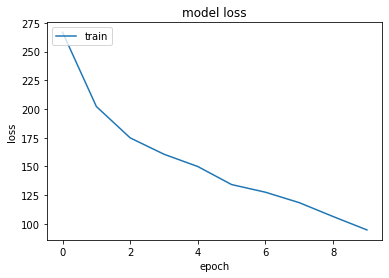

In [46]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Save load model

In [48]:
model10.save('model10.h5')

In [ ]:
model10 = tf.keras.models.load_model('model10.h5')

# Evaluation du model 

In [49]:
test_loss, test_acc = model10.evaluate(X_test,y_test)

3534/3534 [==============================] - 6s 2ms/step - loss: 95.2765 - accuracy: 0.5313


# ensemble classifier

In [50]:
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import *
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix

In [51]:
model1 = SGDClassifier(random_state=0)
model2 = DecisionTreeClassifier(max_features=7, random_state=0)
model3 = KNeighborsClassifier(n_neighbors=1, metric='manhattan', n_jobs=-1)
model4 = RandomForestClassifier(n_estimators=9, max_features=9,  n_jobs=-1)
model5 = AdaBoostClassifier()
model6 = GaussianNB()

In [ ]:
param_grid = {'n_neighbors':np.arange(1,10),
             'metric':['euclidean','manhattan']}

grid = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, n_jobs=-1)
grid.fit(X_train, y_train)
grid.best_score_

In [ ]:
grid.best_params_

In [ ]:
param_grid = {'n_estimators':np.arange(1,10),
             'max_features':np.arange(1,10)}

grid = GridSearchCV(RandomForestClassifier(), param_grid, cv=5, n_jobs=-1)
grid.fit(X_train, y_train)
grid.best_score_

In [ ]:
grid.best_params_

In [ ]:
param_grid = {'max_features':np.arange(1,10)}

grid = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5, n_jobs=-1)
grid.fit(X_train, y_train)
grid.best_score_

In [ ]:
grid.best_params_

# votingClassifier

In [52]:
#voting hard voting, soft voting
model11 = VotingClassifier([#('sgd', model1), 
                          ('tree', model2),
                          ('kn', model3),
                          ('rdforest',model4),
                          ('ada',model5),
                          #('bayes',model6)
],
                         voting='soft')

In [58]:
for model in (model1, model2, model3, model4, model5, model6, model11):
    model.fit(X_train, y_train)
    print(model.__class__.__name__, model.score(X_test, y_test))
    print(confusion_matrix(y_test, model.predict(X_test)))

SGDClassifier 0.5000309529073623
[[    2 56534]
 [    0 56539]]
DecisionTreeClassifier 0.863046650453239
[[48038  8498]
 [ 6988 49551]]
KNeighborsClassifier 0.8533009064780013
[[44623 11913]
 [ 4675 51864]]
RandomForestClassifier 0.922210921954455
[[53645  2891]
 [ 5905 50634]]
AdaBoostClassifier 0.8713154985629007
[[49209  7327]
 [ 7224 49315]]
GaussianNB 0.5826752155648905
[[23630 32906]
 [14283 42256]]
VotingClassifier 0.9310811408357285
[[53261  3275]
 [ 4518 52021]]


# courbe d aprentissage

In [59]:
from sklearn.model_selection import learning_curve

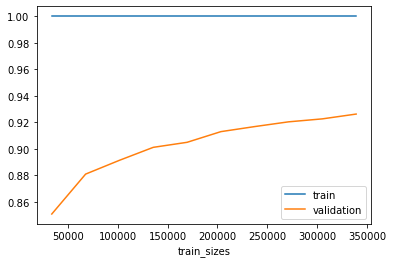

In [60]:
N, train_score, val_score = learning_curve(model11, X_train, y_train, train_sizes=np.linspace(0.1,1.0,10), cv=4)

plt.plot(N, train_score.mean(axis=1), label='train')
plt.plot(N, val_score.mean(axis=1), label='validation')
plt.xlabel('train_sizes')
plt.legend()